## Interannual differences in Nutrients, temperature and Ice Fraction

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy
import pandas as pd
import matplotlib
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
plt.rcParams['mathtext.default']='regular'
from collections import OrderedDict
import cmocean
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib
# Scientific libraries
from numpy import arange,array,ones
from scipy import stats
import os

%matplotlib inline
from glob import glob
import dask
import esmlab
import pop_tools 
from statistics import mean

## Find the high vs low temperature years

In [2]:
temp_inds = sorted(glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_TEMP.*.nc', recursive=True))
ds_01= xr.open_mfdataset(temp_inds[1::],concat_dim='time', combine='nested') # Full 62 years of second cycle

In [3]:
%%time
temp_ds_inter = np.empty([62,12,180,360])
temp_ds_inter[:] = np.nan
x = np.array(range(0,744,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(62):
    temp_ds_inter[i,:,:,:] = ds_01.TEMP[x[i]:x[i]+12,0,:,:]

CPU times: user 11 s, sys: 16.4 s, total: 27.4 s
Wall time: 39.8 s


In [4]:
temp_arctic_01 = np.nanmean(temp_ds_inter[:,:,149:180,:], axis=(2,3))
temp_arctic_anom_01 = temp_arctic_01-np.nanmean(temp_arctic_01,axis=0)
err_ao_01 = np.nanstd(temp_arctic_anom_01,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
cold_years_arctic_01 = np.where(np.nanmean(temp_arctic_anom_01,axis=1) < -(err_ao_01/2))
warm_years_arctic_01 = np.where(np.nanmean(temp_arctic_anom_01,axis=1) > (err_ao_01/2))

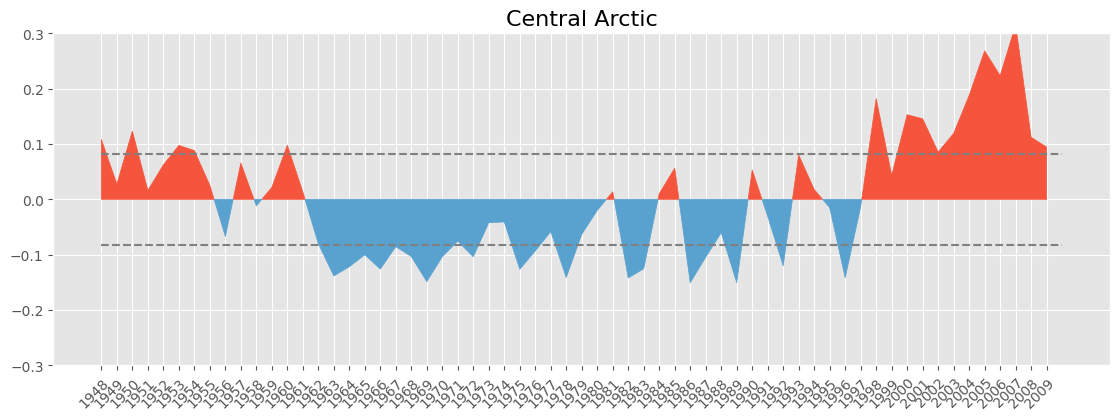

In [5]:
plt.style.use('ggplot')

years = ['1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959',
         "1960",'1961','1962','1963','1964','1965','1966','1967','1968','1969',
         "1970",'1971','1972','1973','1974','1975','1976','1977','1978','1979',
         "1980",'1981','1982','1983','1984','1985','1986','1987','1988','1989',
         "1990",'1991','1992','1993','1994','1995','1996','1997','1998','1999',
         '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'];
cmap= matplotlib.cm.get_cmap('Reds', 10);
cmap1= matplotlib.cm.get_cmap('Blues', 10);

fig = plt.figure(figsize=(30, 25));
gs = GridSpec(nrows=5, ncols=2);

# Subplot 1
ax1 = fig.add_subplot(gs[0, 0]);
ax1.fill_between(years, np.nanmean(temp_arctic_anom_01,axis=1), where=np.nanmean(temp_arctic_anom_01,axis=1)>=0, interpolate=True, color=cmap(5));
ax1.fill_between(years, np.nanmean(temp_arctic_anom_01,axis=1), where=np.nanmean(temp_arctic_anom_01,axis=1)<=0, interpolate=True, color=cmap1(5));
plt.hlines(err_ao_01/2, 0, 62,color='gray',linestyles='dashed')
plt.hlines(-err_ao_01/2, 0, 62,color='gray',linestyles='dashed')
ax1.set_title('Central Arctic', fontsize=16);
ax1.set_ylim(-0.3,0.3);
ax1.set_xticklabels(['1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959',
                    "1960",'1961','1962','1963','1964','1965','1966','1967','1968','1969',
                    "1970",'1971','1972','1973','1974','1975','1976','1977','1978','1979',
                    "1980",'1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    "1990",'1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009']);
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor");

In [6]:
cold_years_01 = np.nanmean(temp_ds_inter[cold_years_arctic_01,:,:,:],axis=(0,1,2))
warm_years_01 = np.nanmean(temp_ds_inter[warm_years_arctic_01,:,:,:],axis=(0,1,2)) 

In [7]:
## Bring in Grid information -- /glade/u/home/gabyn/scratch/SPECTRA/GNG595_2ndcycle_1990-2009_clim/
grid_inds = sorted(glob('/glade/u/home/gabyn/scratch/SPECTRA/GNG595_2ndcycle_1990-2009_clim/regrid/regrid_SPECTRA_TAREA.*.nc', recursive=True))
ds= xr.open_mfdataset(grid_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

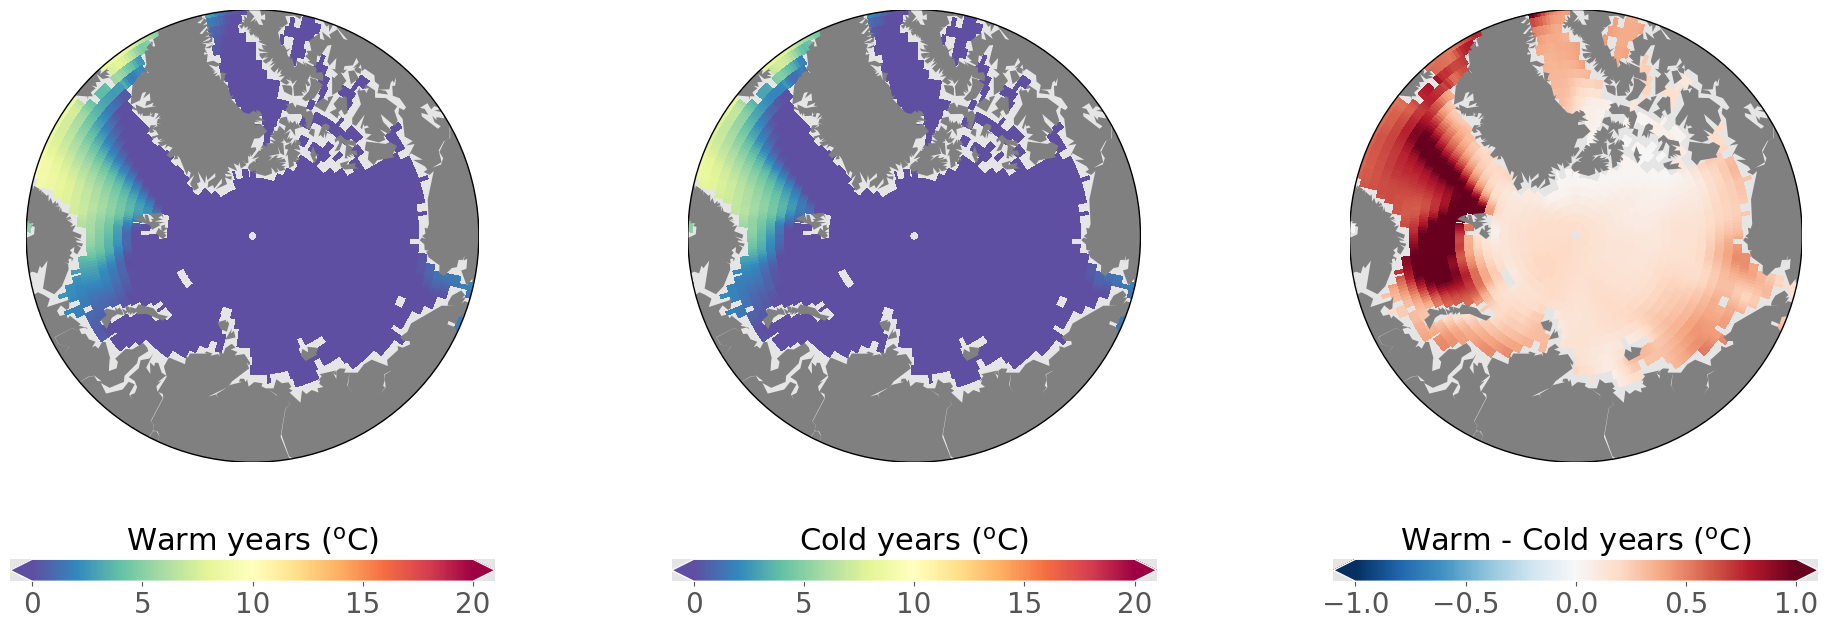

In [8]:
fig = plt.figure(figsize=(20, 20))
lat = ds.lat

# Temperature 
ax = fig.add_subplot(3, 3, 2)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cold, lon = add_cyclic_point(cold_years_01, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,cold,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Cold years ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 1)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
warm, lon = add_cyclic_point(warm_years_01, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,warm,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Warm years ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)


ax = fig.add_subplot(3, 3, 3)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm-cold,cmap='RdBu_r', vmin = -1, vmax = 1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Warm - Cold years ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

plt.tight_layout()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/AO_temp_diff_01.png',dpi=600, bbox_inches='tight')

## Now if we decide to average by grid cell area, how differently would this look?

In [9]:
inter = xr.DataArray(temp_ds_inter, coords={'year':years, 'time':ds.time, 'lat':ds.lat, 'lon':ds.lon},
                      dims=['year', 'time', 'lat', 'lon'])
inter = inter.to_dataset(name='temp_ds_inter')
temp_arctic_02 = esmlab.statistics.weighted_sum(inter.temp_ds_inter[:,:,149:180,:], weights=ds.TAREA[0,149:180,:], dim=['lat', 'lon'])

temp_arctic_anom_02 = temp_arctic_02-np.nanmean(temp_arctic_02,axis=0)
err_ao_02 = np.nanstd(temp_arctic_anom_02,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
cold_years_arctic_02 = np.where(np.nanmean(temp_arctic_anom_02,axis=1) < -(err_ao_02/2))
warm_years_arctic_02 = np.where(np.nanmean(temp_arctic_anom_02,axis=1) > (err_ao_02/2))

In [10]:
cold_years_arctic_02

(array([ 8, 14, 15, 16, 17, 18, 21, 22, 24, 27, 28, 30, 34, 35, 38, 39, 41,
        44, 48]),)

In [11]:
cold_years_arctic_01

(array([15, 16, 17, 18, 19, 20, 21, 22, 24, 27, 28, 30, 34, 35, 38, 39, 41,
        44, 48]),)

In [12]:
cold_years_temp_02 = np.nanmean(temp_ds_inter[cold_years_arctic_02,:,:,:],axis=(0,1,2))
warm_years_temp_02 = np.nanmean(temp_ds_inter[warm_years_arctic_02,:,:,:],axis=(0,1,2)) 

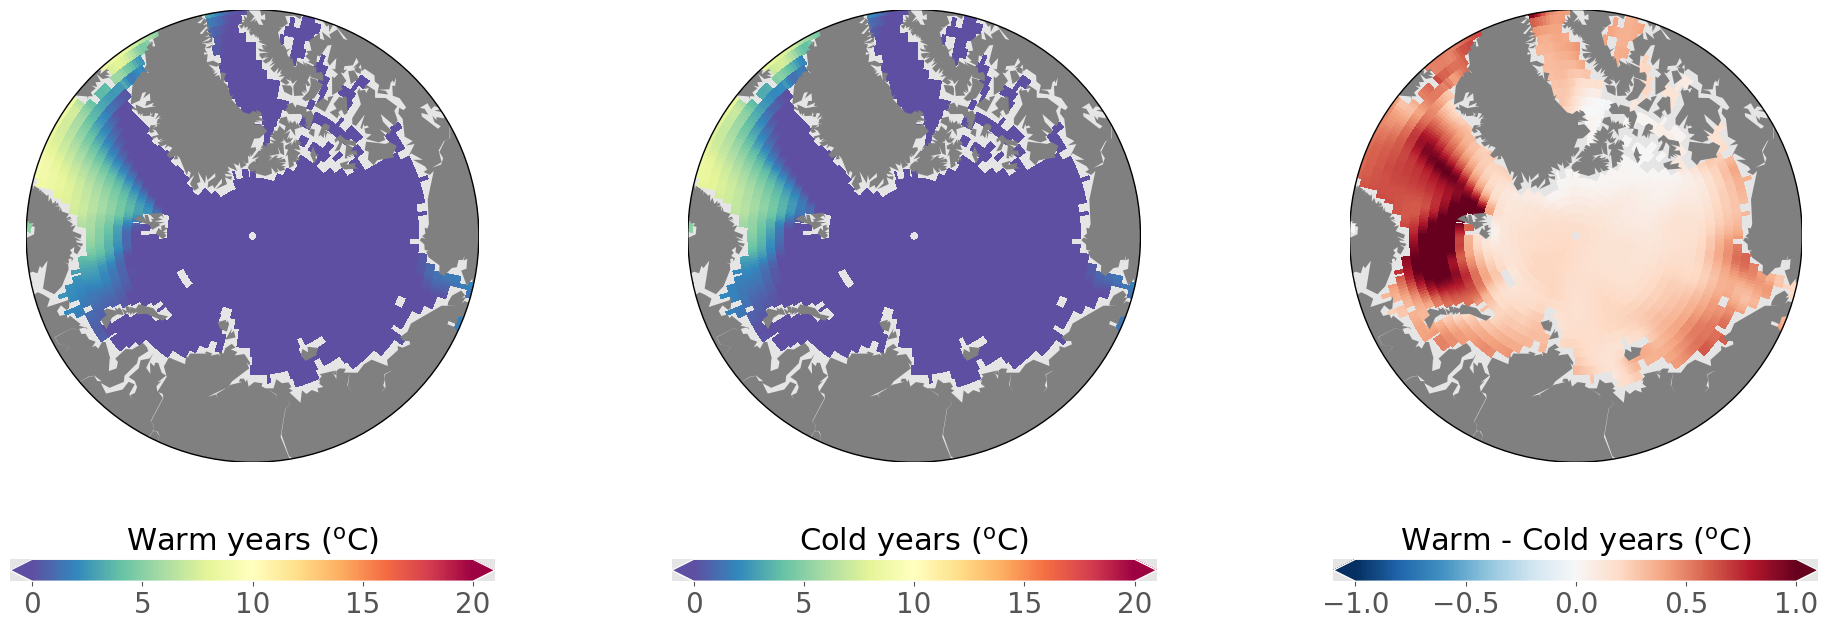

In [13]:
fig = plt.figure(figsize=(20, 20))
lat = ds.lat

# Temperature 
ax = fig.add_subplot(3, 3, 2)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cold, lon = add_cyclic_point(cold_years_temp_02, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,cold,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Cold years ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 1)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
warm, lon = add_cyclic_point(warm_years_temp_02, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,warm,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Warm years ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)


ax = fig.add_subplot(3, 3, 3)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm-cold,cmap='RdBu_r', vmin = -1, vmax = 1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Warm - Cold years ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

plt.tight_layout()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/AO_temp_diff_weighted.png',dpi=600, bbox_inches='tight')

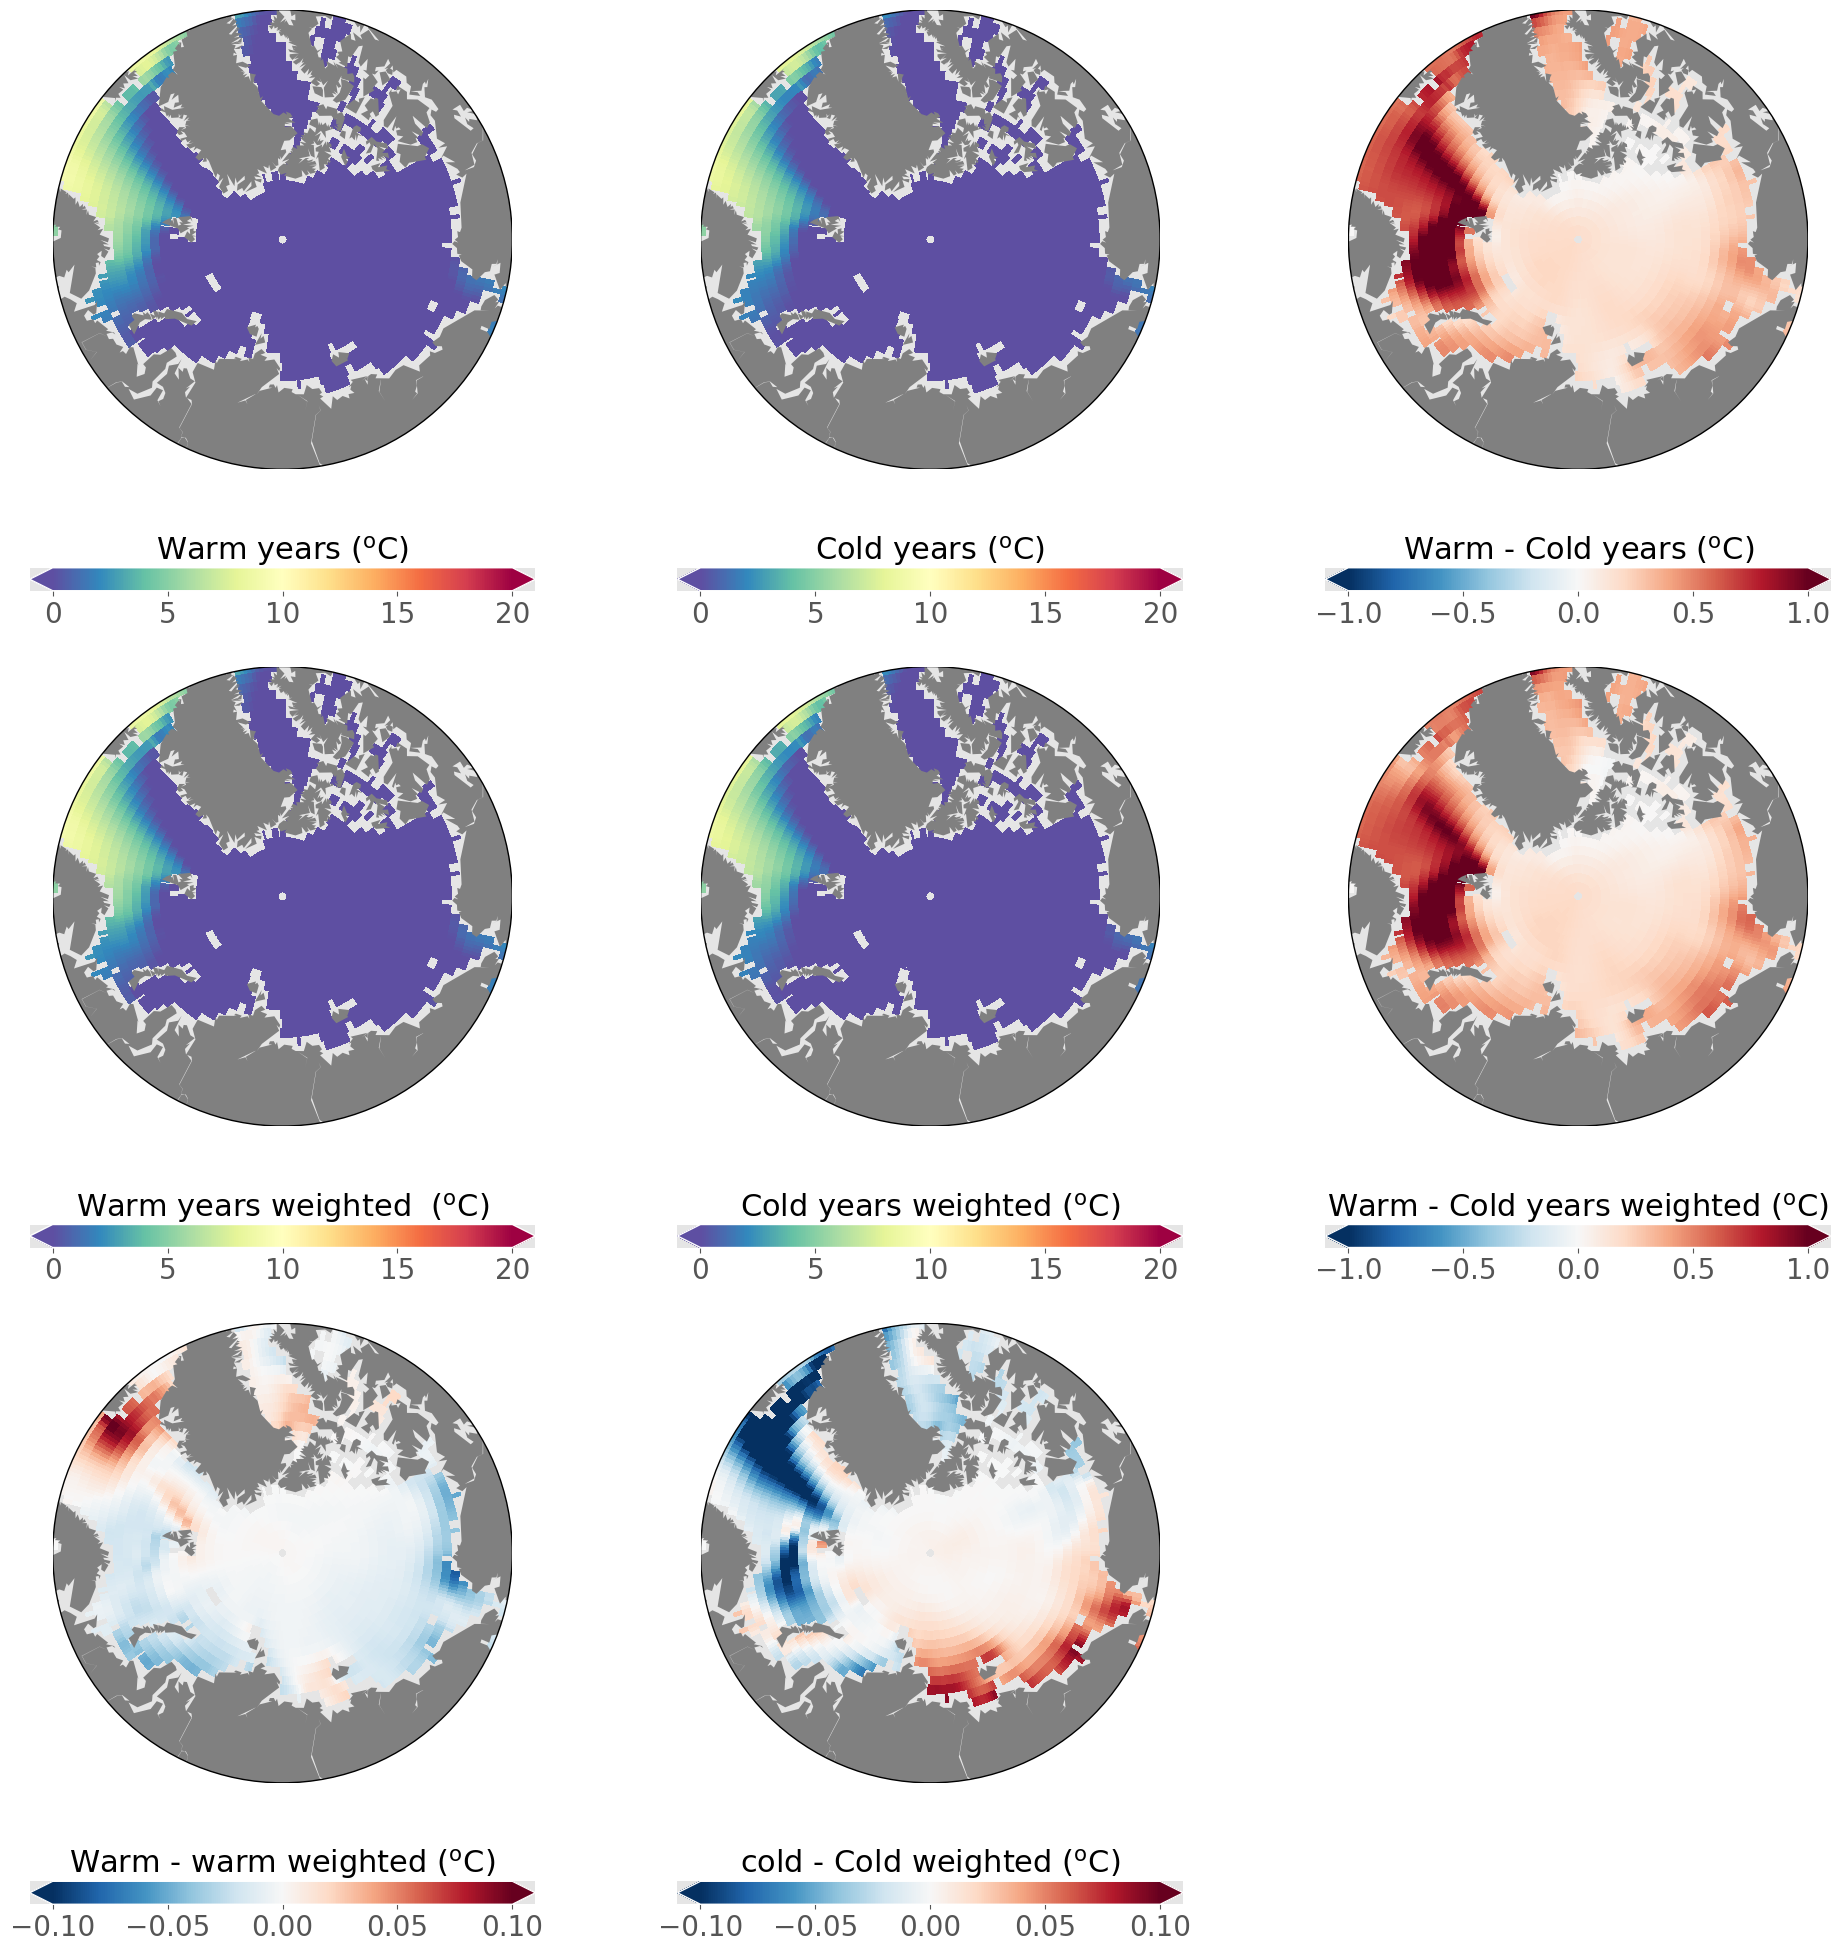

In [14]:
fig = plt.figure(figsize=(20, 20))
lat = ds.lat

# Temperature 
ax = fig.add_subplot(3, 3, 2)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cold_01, lon = add_cyclic_point(cold_years_01, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,cold_01,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Cold years ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 1)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
warm_01, lon = add_cyclic_point(warm_years_01, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,warm_01,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Warm years ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 3)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm_01-cold_01,cmap='RdBu_r', vmin = -1, vmax = 1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Warm - Cold years ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 5)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cold_02, lon = add_cyclic_point(cold_years_temp_02, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,cold_02,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Cold years weighted ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 4)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
warm_02, lon = add_cyclic_point(warm_years_temp_02, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,warm_02,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Warm years weighted  ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)


ax = fig.add_subplot(3, 3, 6)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm_02-cold_02,cmap='RdBu_r', vmin = -1, vmax = 1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Warm - Cold years weighted ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 7)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm_01-warm_02,cmap='RdBu_r', vmin = -0.1, vmax = 0.1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Warm - warm weighted ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 8)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,cold_01-cold_02,cmap='RdBu_r', vmin = -0.1, vmax = 0.1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('cold - Cold weighted ($^oC$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

plt.tight_layout()

In [15]:
case = 'g.e21.G1850ECOIAF.t62_g17.marbl0_33.GNG595'
path = f'/glade/campaign/cesm/development/bgcwg/projects/marbl-spectra/{case}/ocn/hist'

variables = [f'{var}' for var in ['TEMP']]
coords = {'x':'TLONG','y':'TLAT'}
keep_vars = variables + list(coords.values())+['dz','KMT','time']

In [17]:
%%time

ds_summer_avg = xr.Dataset()
ds_spring_avg = xr.Dataset()
ds_fall_avg = xr.Dataset()
ds_winter_avg =xr.Dataset()

for year in np.arange(63,125,1):
    yr4="0{:02d}".format(year).zfill(4)
    print(year)
    
    ds_summer = xr.Dataset()
    ds_spring = xr.Dataset()
    ds_winter = xr.Dataset()
    ds_fall = xr.Dataset()

    file = sorted(glob(f'{path}/{case}.pop.h.{yr4}-*.nc'))
    
    winter_indexes = [0,1,-1]
    winter_files = [file[ind] for ind in winter_indexes]
    dsv_winter=xr.open_mfdataset(winter_files, decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
        
    dsv_summer=xr.open_mfdataset(file[5:8], decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
    dsv_spring=xr.open_mfdataset(file[2:5], decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
    dsv_fall=xr.open_mfdataset(file[8:11], decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
    
    for vv in variables: 
        ds_summer = xr.merge((ds_summer, dsv_summer[vv]))
        ds_spring = xr.merge((ds_spring, dsv_spring[vv]))
        ds_winter = xr.merge((ds_winter, dsv_winter[vv]))
        ds_fall = xr.merge((ds_fall, dsv_fall[vv]))
        

    ds_summer = ds_summer.drop([v for v in ds_summer.variables if v not in keep_vars]).squeeze()
    ds_summer = ds_summer.mean(dim='time')
    ds_summer_avg = xr.concat([ds_summer_avg, ds_summer],dim='year')
    
    ds_spring = ds_spring.drop([v for v in ds_spring.variables if v not in keep_vars]).squeeze()
    ds_spring = ds_spring.mean(dim='time')
    ds_spring_avg = xr.concat([ds_spring_avg, ds_spring],dim='year')
    
    ds_winter = ds_winter.drop([v for v in ds_winter.variables if v not in keep_vars]).squeeze()
    ds_winter = ds_winter.mean(dim='time')
    ds_winter_avg = xr.concat([ds_winter_avg, ds_winter],dim='year')
    
    ds_fall = ds_fall.drop([v for v in ds_fall.variables if v not in keep_vars]).squeeze()
    ds_fall = ds_fall.mean(dim='time')
    ds_fall_avg = xr.concat([ds_fall_avg, ds_fall],dim='year')

63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
CPU times: user 10min 24s, sys: 35.5 s, total: 10min 59s
Wall time: 12min 19s


In [18]:
temp_summer = np.array(ds_summer_avg.TEMP)
temp_winter = np.array(ds_winter_avg.TEMP)
temp_fall = np.array(ds_fall_avg.TEMP)
temp_spring = np.array(ds_spring_avg.TEMP)

In [19]:
cold_years_summer = temp_summer[cold_years_arctic_02,0,:,:] # 1/2 standard deviation 
warm_years_summer = temp_summer[warm_years_arctic_02,0,:,:] # 1/2 standard deviation 

cold_years_spring = temp_spring[cold_years_arctic_02,0,:,:] # 1/2 standard deviation 
warm_years_spring = temp_spring[warm_years_arctic_02,0,:,:] # 1/2 standard deviation 

cold_years_fall = temp_fall[cold_years_arctic_02,0,:,:] # 1/2 standard deviation 
warm_years_fall = temp_fall[warm_years_arctic_02,0,:,:] # 1/2 standard deviation 

cold_years_winter = temp_winter[cold_years_arctic_02,0,:,:] # 1/2 standard deviation 
warm_years_winter = temp_winter[warm_years_arctic_02,0,:,:] # 1/2 standard deviation 

In [20]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

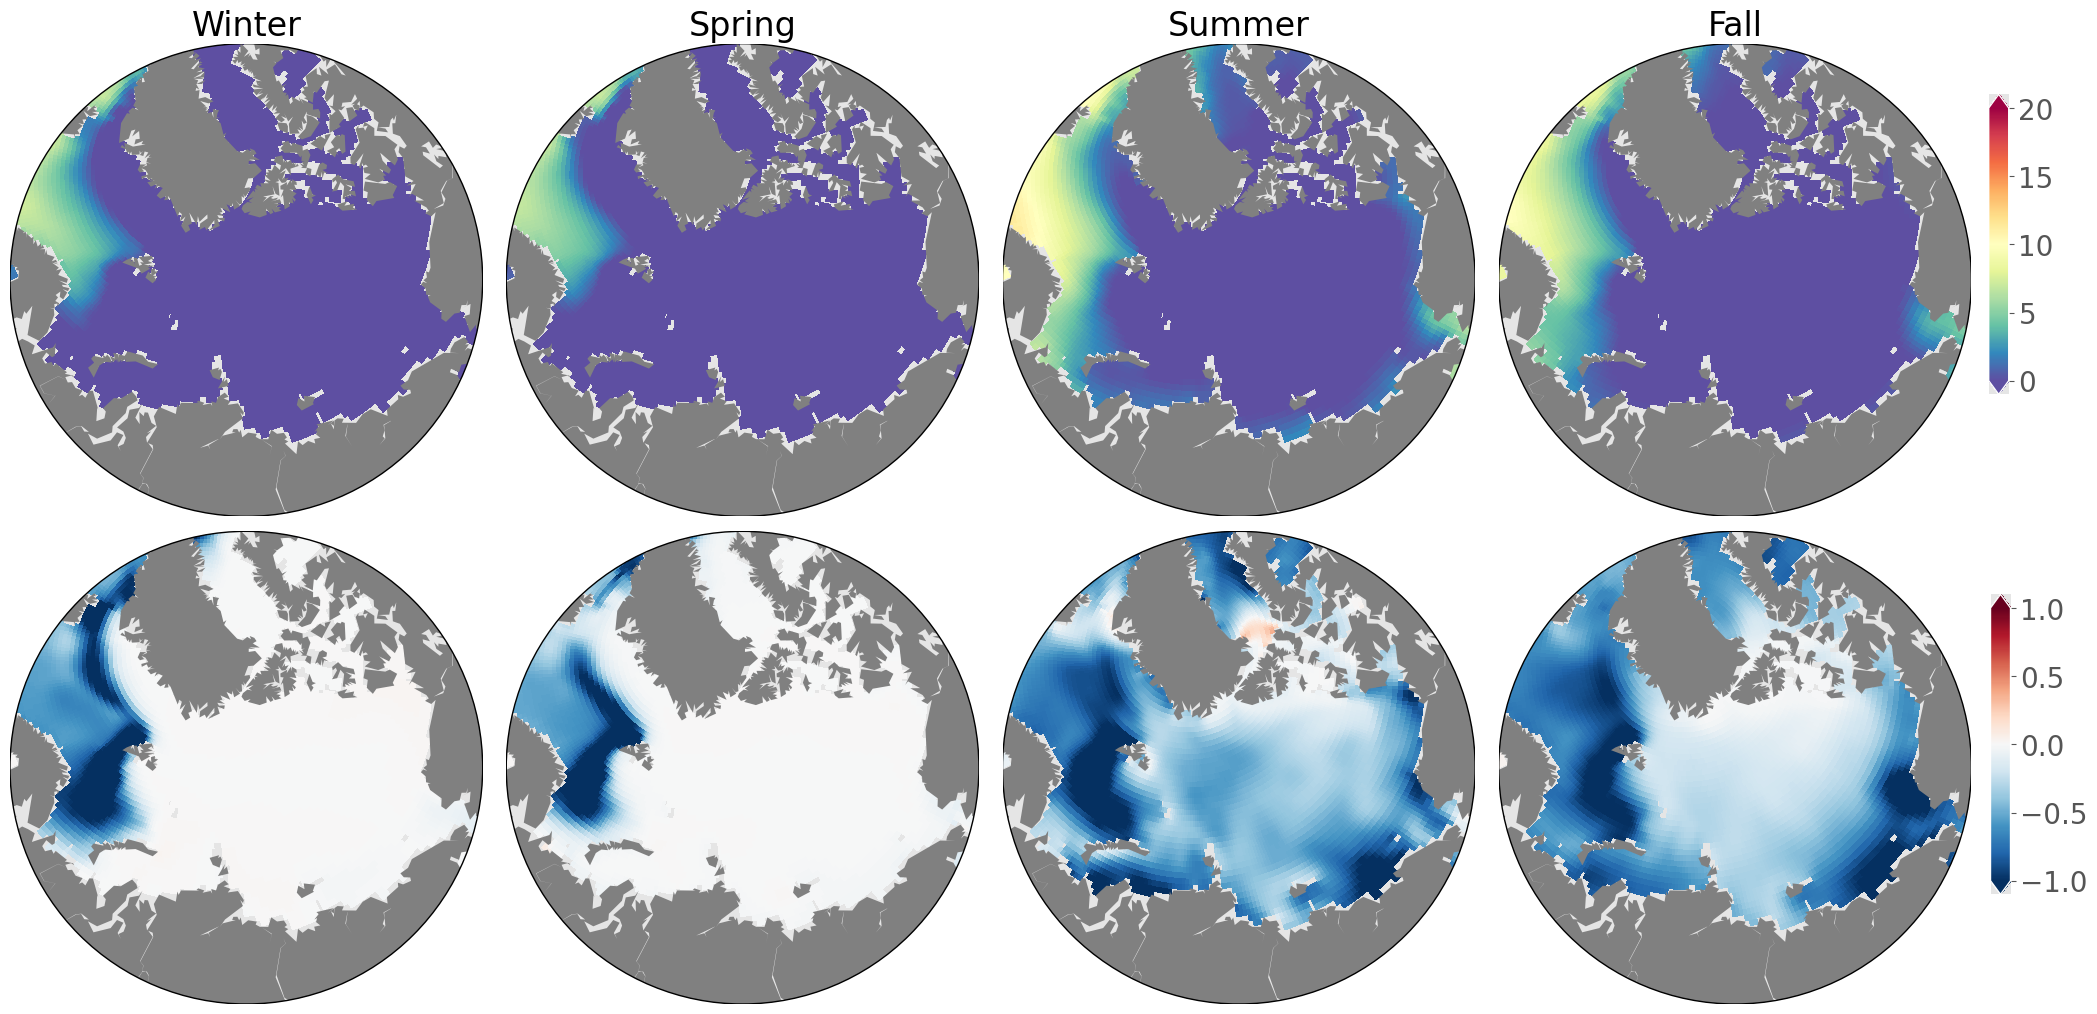

In [21]:
lev = np.arange(0, 1, 0.01)
norm = colors.TwoSlopeNorm(vmin=lev[0], vmax=lev[-1], vcenter=0.5)
fig = plt.figure(figsize=(20, 20))

# Winter 
ax = fig.add_subplot(4, 4, 1)
lon, lat, winter = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_winter_avg.TEMP[:,0,:,:],axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, winter, cmap='Spectral_r', vmin = 0, vmax = 20);
ax.set_title('Winter', fontsize =24)

# Spring 
ax = fig.add_subplot(4, 4, 2)
#ax = axes_1[2]
lon, lat, spring = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_spring_avg.TEMP[:,0,:,:], axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, spring, cmap='Spectral_r', vmin = 0, vmax = 20);
ax.set_title('Spring', fontsize =24)

# Summer 
ax = fig.add_subplot(4, 4, 3)
#ax = axes_1[3]
lon, lat, summer = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_summer_avg.TEMP[:,0,:,:], axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, summer, cmap='Spectral_r', vmin = 0, vmax = 20);
ax.set_title('Summer', fontsize =24)

# Fall 
ax = fig.add_subplot(4, 4, 4)
#ax = axes_1[4]
lon, lat, fall = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_fall_avg.TEMP[:,0,:,:], axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, fall, cmap='Spectral_r', vmin = 0, vmax = 20);
ax.set_title('Fall', fontsize =24)

cbar_ax = fig.add_axes([0.999, 0.8, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
cb.ax.tick_params(labelsize=20)

########## Differences!!! ############
vminn = -1
vmaxx = 1
##########################################



# Winter, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 5)
#ax = axes_2[0]
winter_temp_diff = ((np.nanmean(cold_years_winter, axis=(0,1))-np.nanmean(warm_years_winter, axis=(0,1))))
lon, lat, w_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, winter_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, w_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Spring, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 6)
#ax = axes_2[1]
spring_temp_diff = ((np.nanmean(cold_years_spring, axis=(0,1))-np.nanmean(warm_years_spring, axis=(0,1))))
lon, lat, sp_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, spring_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, sp_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Summer, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 7)
#ax = axes_2[2]
summer_temp_diff = ((np.nanmean(cold_years_summer, axis=(0,1))-np.nanmean(warm_years_summer, axis=(0,1))))
lon, lat, s_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, summer_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, s_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);


# Fall, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 8)
#ax = axes_2[3]
fall_temp_diff = ((np.nanmean(cold_years_fall, axis=(0,1))-np.nanmean(warm_years_fall, axis=(0,1))))
lon, lat, f_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, fall_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, f_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

cbar_ax = fig.add_axes([0.9999, 0.55, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
cb.ax.tick_params(labelsize=20)
plt.tight_layout()

## Nutrients

In [22]:
NO3_inds = sorted(glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_NO3*.nc', recursive=True))
ds_03= xr.open_mfdataset(NO3_inds[1::],concat_dim='time', combine='nested') # Full 62 years of second cycle

In [23]:
NO3_ds_inter = np.empty([62,12,180,360])
NO3_ds_inter[:] = np.nan
x = np.array(range(0,744,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(62):
    NO3_ds_inter[i,:,:,:] = ds_03.NO3[x[i]:x[i]+12,0,:,:]

In [25]:
## Unweighted 
no3_arctic_01 = np.nanmean(NO3_ds_inter[:,:,149:180,:], axis=(2,3))
no3_arctic_anom_01 = no3_arctic_01-np.nanmean(no3_arctic_01,axis=0)
err_ao_01 = np.nanstd(no3_arctic_anom_01,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/2 of standard deviation 
low_no3_years_arctic_01 = np.where(np.nanmean(no3_arctic_anom_01,axis=1) < -(err_ao_01/2))
high_no3_years_arctic_01 = np.where(np.nanmean(no3_arctic_anom_01,axis=1) > (err_ao_01/2))

low_no3_years_01 = np.nanmean(temp_ds_inter[low_no3_years_arctic_01,:,:,:],axis=(0,1,2))
high_no3_years_01 = np.nanmean(temp_ds_inter[high_no3_years_arctic_01,:,:,:],axis=(0,1,2)) 

In [27]:
# Weighted by Area 
inter['NO3_ds_inter'] = xr.DataArray(NO3_ds_inter, coords={'year':ds_fall_avg.year, 'time':ds.time, 'lat':ds.lat, 'lon':ds.lon},
                      dims=['year', 'time', 'lat', 'lon'])
no3_arctic_02 = esmlab.statistics.weighted_sum(inter.NO3_ds_inter[:,:,149:180,:], weights=ds.TAREA[0,149:180,:], dim=['lat', 'lon'])
no3_arctic_anom_02 = no3_arctic_02-np.nanmean(no3_arctic_02,axis=0)
err_ao_02 = np.nanstd(no3_arctic_anom_02,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/2 of standard deviation 
low_no3_years_arctic_02 = np.where(np.nanmean(no3_arctic_anom_02,axis=1) < -(err_ao_02/2))
high_no3_years_arctic_02 = np.where(np.nanmean(no3_arctic_anom_02,axis=1) > (err_ao_02/2))

low_no3_years_02 = np.nanmean(temp_ds_inter[low_no3_years_arctic_02,:,:,:],axis=(0,1,2))
high_no3_years_02 = np.nanmean(temp_ds_inter[high_no3_years_arctic_02,:,:,:],axis=(0,1,2)) 

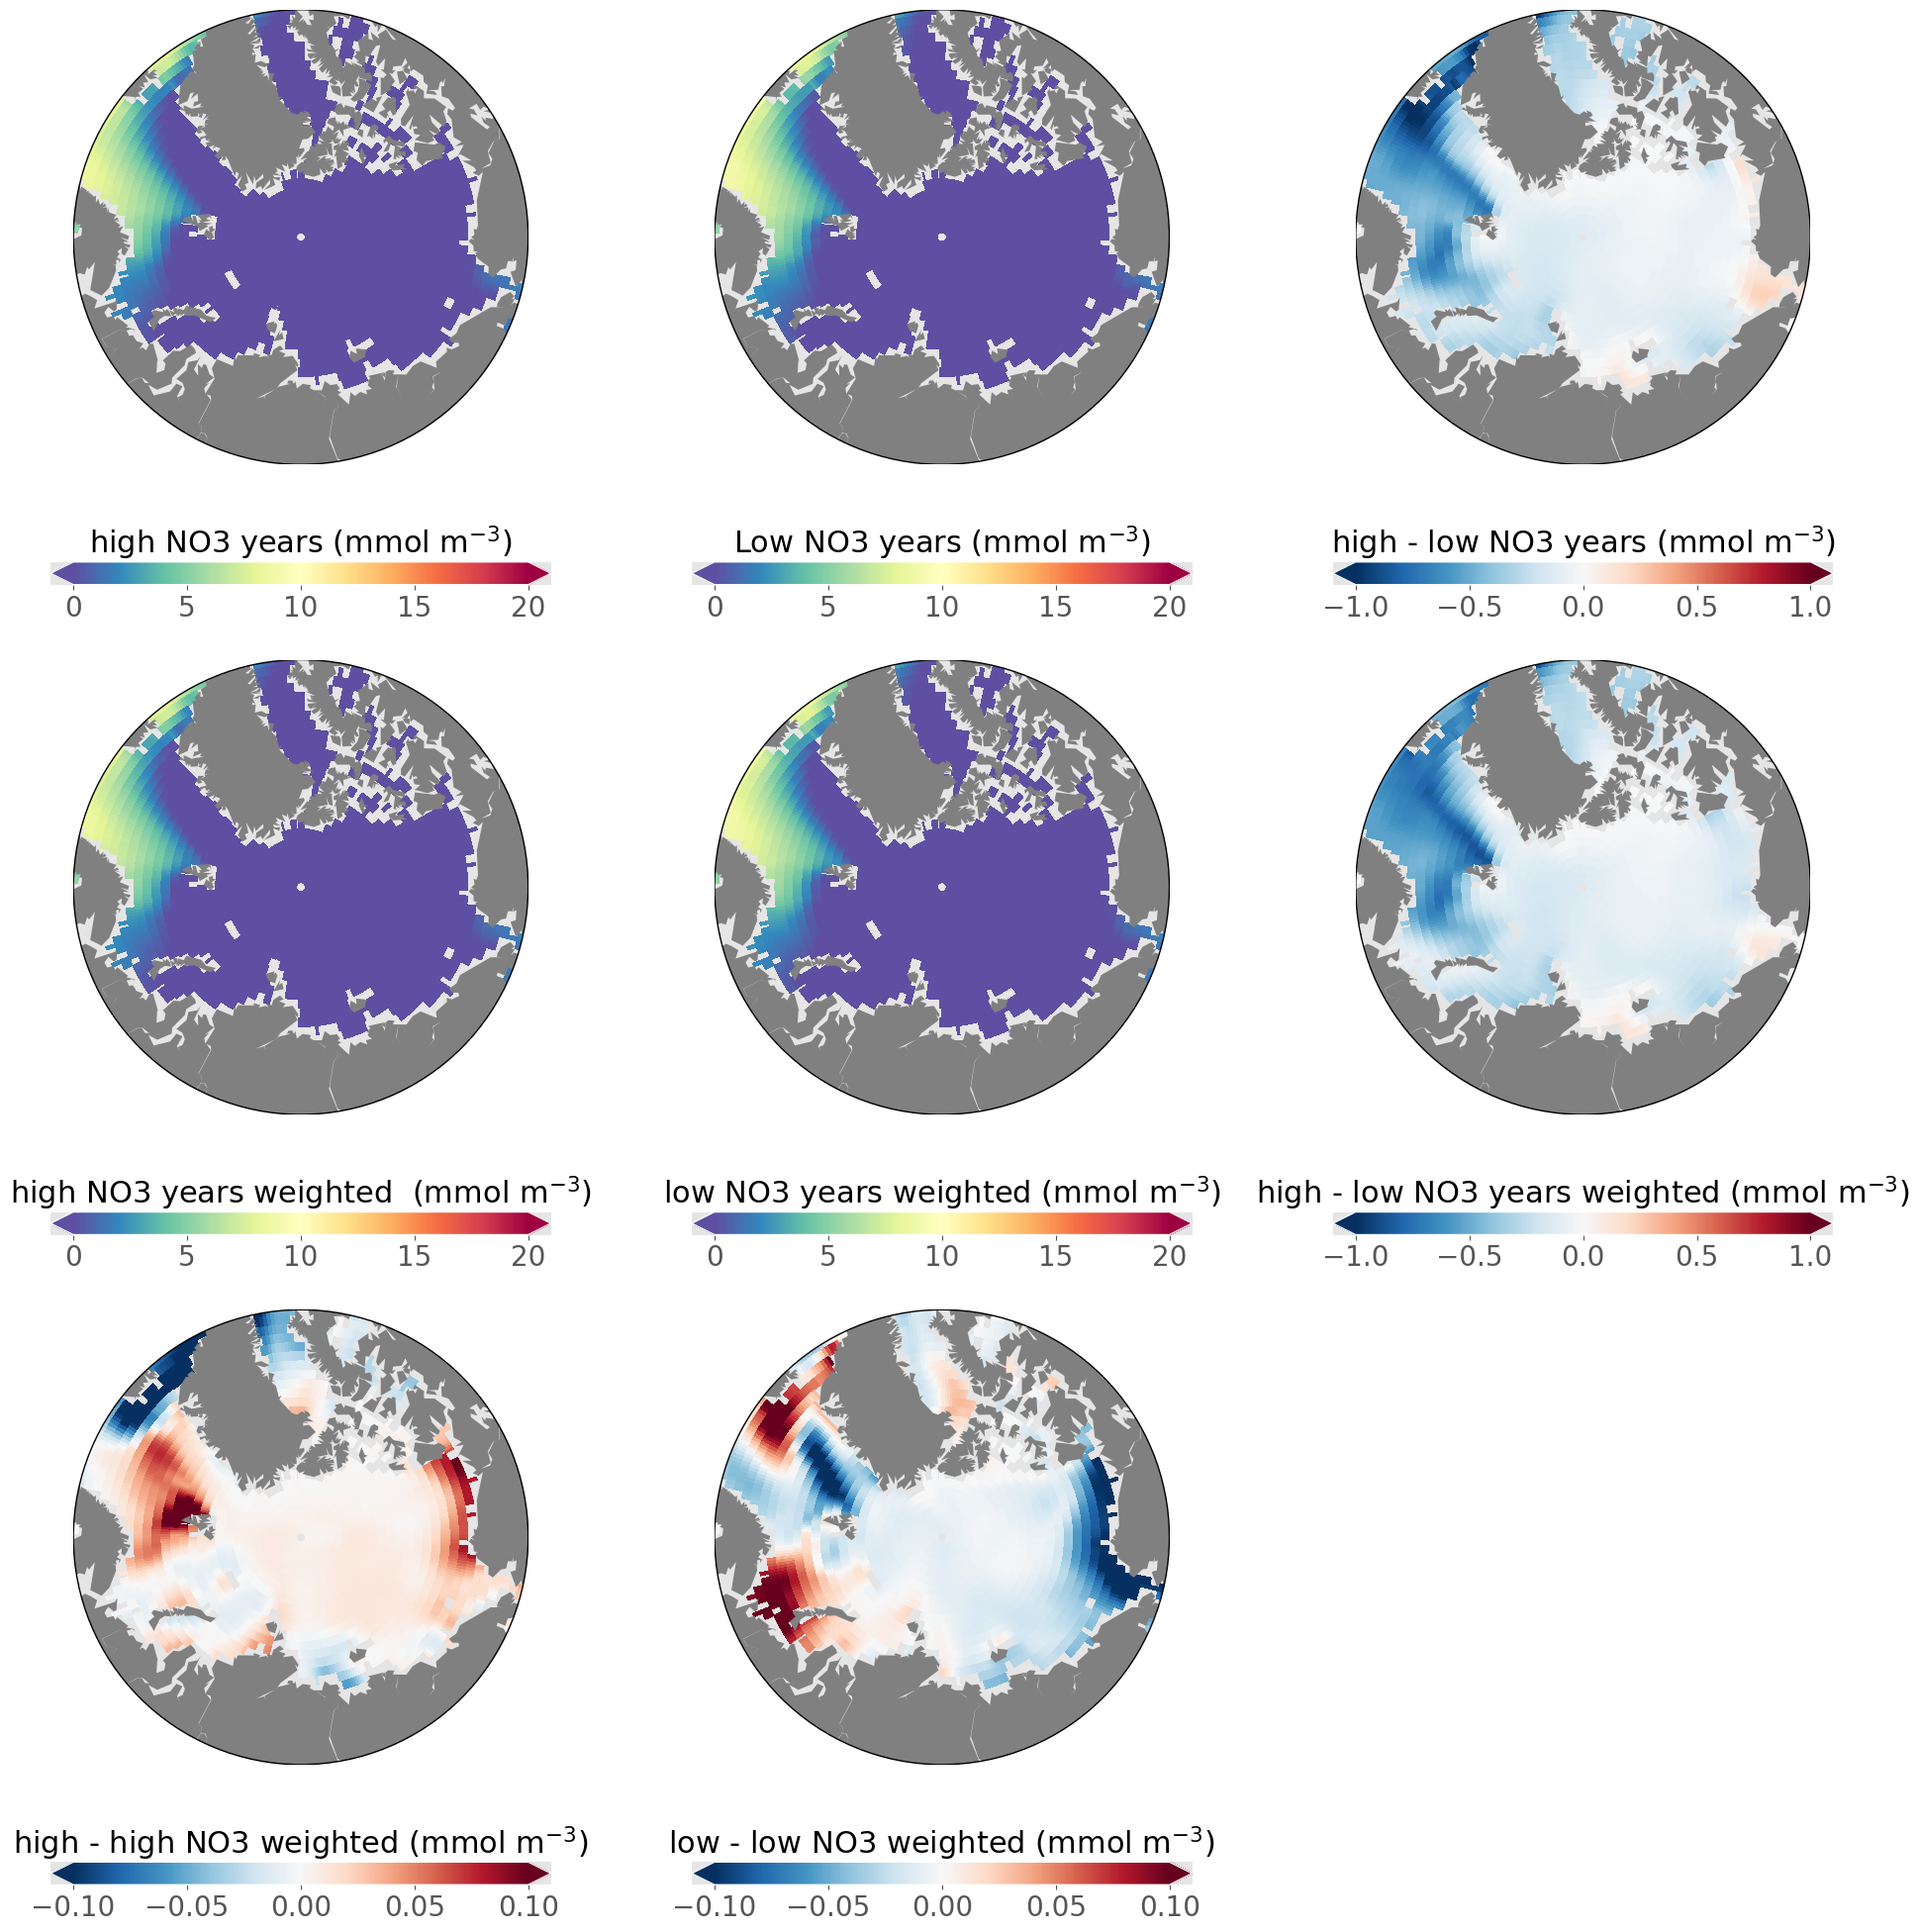

In [29]:
fig = plt.figure(figsize=(20, 20))
lat = ds.lat

# Temperature 
ax = fig.add_subplot(3, 3, 2)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cold_01, lon = add_cyclic_point(low_no3_years_01, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,cold_01,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('Low NO3 years (mmol $m^{-3}$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 1)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
warm_01, lon = add_cyclic_point(high_no3_years_01, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,warm_01,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('high NO3 years (mmol $m^{-3}$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 3)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm_01-cold_01,cmap='RdBu_r', vmin = -1, vmax = 1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('high - low NO3 years (mmol $m^{-3}$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 5)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cold_02, lon = add_cyclic_point(low_no3_years_02, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,cold_02,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('low NO3 years weighted (mmol $m^{-3}$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 4)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
warm_02, lon = add_cyclic_point(high_no3_years_02, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,warm_02,cmap='Spectral_r',vmin=0,vmax=20)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('high NO3 years weighted  (mmol $m^{-3}$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)


ax = fig.add_subplot(3, 3, 6)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm_02-cold_02,cmap='RdBu_r', vmin = -1, vmax = 1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('high - low NO3 years weighted (mmol $m^{-3}$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 7)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm_01-warm_02,cmap='RdBu_r', vmin = -0.1, vmax = 0.1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('high - high NO3 weighted (mmol $m^{-3}$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 8)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,cold_01-cold_02,cmap='RdBu_r', vmin = -0.1, vmax = 0.1)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title('low - low NO3 weighted (mmol $m^{-3}$)', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

plt.tight_layout()

In [30]:
case = 'g.e21.G1850ECOIAF.t62_g17.marbl0_33.GNG595'
path = f'/glade/campaign/cesm/development/bgcwg/projects/marbl-spectra/{case}/ocn/hist'

variables = [f'{var}' for var in ['NO3']]
coords = {'x':'TLONG','y':'TLAT'}
keep_vars = variables + list(coords.values())+['dz','KMT','time']

In [31]:
%%time

ds_summer_avg = xr.Dataset()
ds_spring_avg = xr.Dataset()
ds_fall_avg = xr.Dataset()
ds_winter_avg =xr.Dataset()

for year in np.arange(63,125,1):
    yr4="0{:02d}".format(year).zfill(4)
    print(year)
    
    ds_summer = xr.Dataset()
    ds_spring = xr.Dataset()
    ds_winter = xr.Dataset()
    ds_fall = xr.Dataset()

    file = sorted(glob(f'{path}/{case}.pop.h.{yr4}-*.nc'))
    
    winter_indexes = [0,1,-1]
    winter_files = [file[ind] for ind in winter_indexes]
    dsv_winter=xr.open_mfdataset(winter_files, decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
        
    dsv_summer=xr.open_mfdataset(file[5:8], decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
    dsv_spring=xr.open_mfdataset(file[2:5], decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
    dsv_fall=xr.open_mfdataset(file[8:11], decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
    
    for vv in variables: 
        ds_summer = xr.merge((ds_summer, dsv_summer[vv]))
        ds_spring = xr.merge((ds_spring, dsv_spring[vv]))
        ds_winter = xr.merge((ds_winter, dsv_winter[vv]))
        ds_fall = xr.merge((ds_fall, dsv_fall[vv]))
        

    ds_summer = ds_summer.drop([v for v in ds_summer.variables if v not in keep_vars]).squeeze()
    ds_summer = ds_summer.mean(dim='time')
    ds_summer_avg = xr.concat([ds_summer_avg, ds_summer],dim='year')
    
    ds_spring = ds_spring.drop([v for v in ds_spring.variables if v not in keep_vars]).squeeze()
    ds_spring = ds_spring.mean(dim='time')
    ds_spring_avg = xr.concat([ds_spring_avg, ds_spring],dim='year')
    
    ds_winter = ds_winter.drop([v for v in ds_winter.variables if v not in keep_vars]).squeeze()
    ds_winter = ds_winter.mean(dim='time')
    ds_winter_avg = xr.concat([ds_winter_avg, ds_winter],dim='year')
    
    ds_fall = ds_fall.drop([v for v in ds_fall.variables if v not in keep_vars]).squeeze()
    ds_fall = ds_fall.mean(dim='time')
    ds_fall_avg = xr.concat([ds_fall_avg, ds_fall],dim='year')

63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
CPU times: user 10min 22s, sys: 35.7 s, total: 10min 57s
Wall time: 12min 8s


In [32]:
no3_summer = np.array(ds_summer_avg.NO3)
no3_winter = np.array(ds_winter_avg.NO3)
no3_fall = np.array(ds_fall_avg.NO3)
no3_spring = np.array(ds_spring_avg.NO3)

In [33]:
high_no3_years_summer = no3_summer[cold_years_arctic_02,0,:,:] # 1/2 standard deviation 
low_no3_years_summer = no3_summer[low_no3_years_arctic_02,0,:,:] # 1/2 standard deviation 

high_no3_years_spring = no3_spring[high_no3_years_arctic_02,0,:,:] # 1/2 standard deviation 
low_no3_years_spring = no3_spring[low_no3_years_arctic_02,0,:,:] # 1/2 standard deviation 

high_no3_years_fall = no3_fall[high_no3_years_arctic_02,0,:,:] # 1/2 standard deviation 
low_no3_years_fall = no3_fall[low_no3_years_arctic_02,0,:,:] # 1/2 standard deviation 

high_no3_years_winter = no3_winter[high_no3_years_arctic_02,0,:,:] # 1/2 standard deviation 
low_no3_years_winter = no3_winter[low_no3_years_arctic_02,0,:,:] # 1/2 standard deviation 

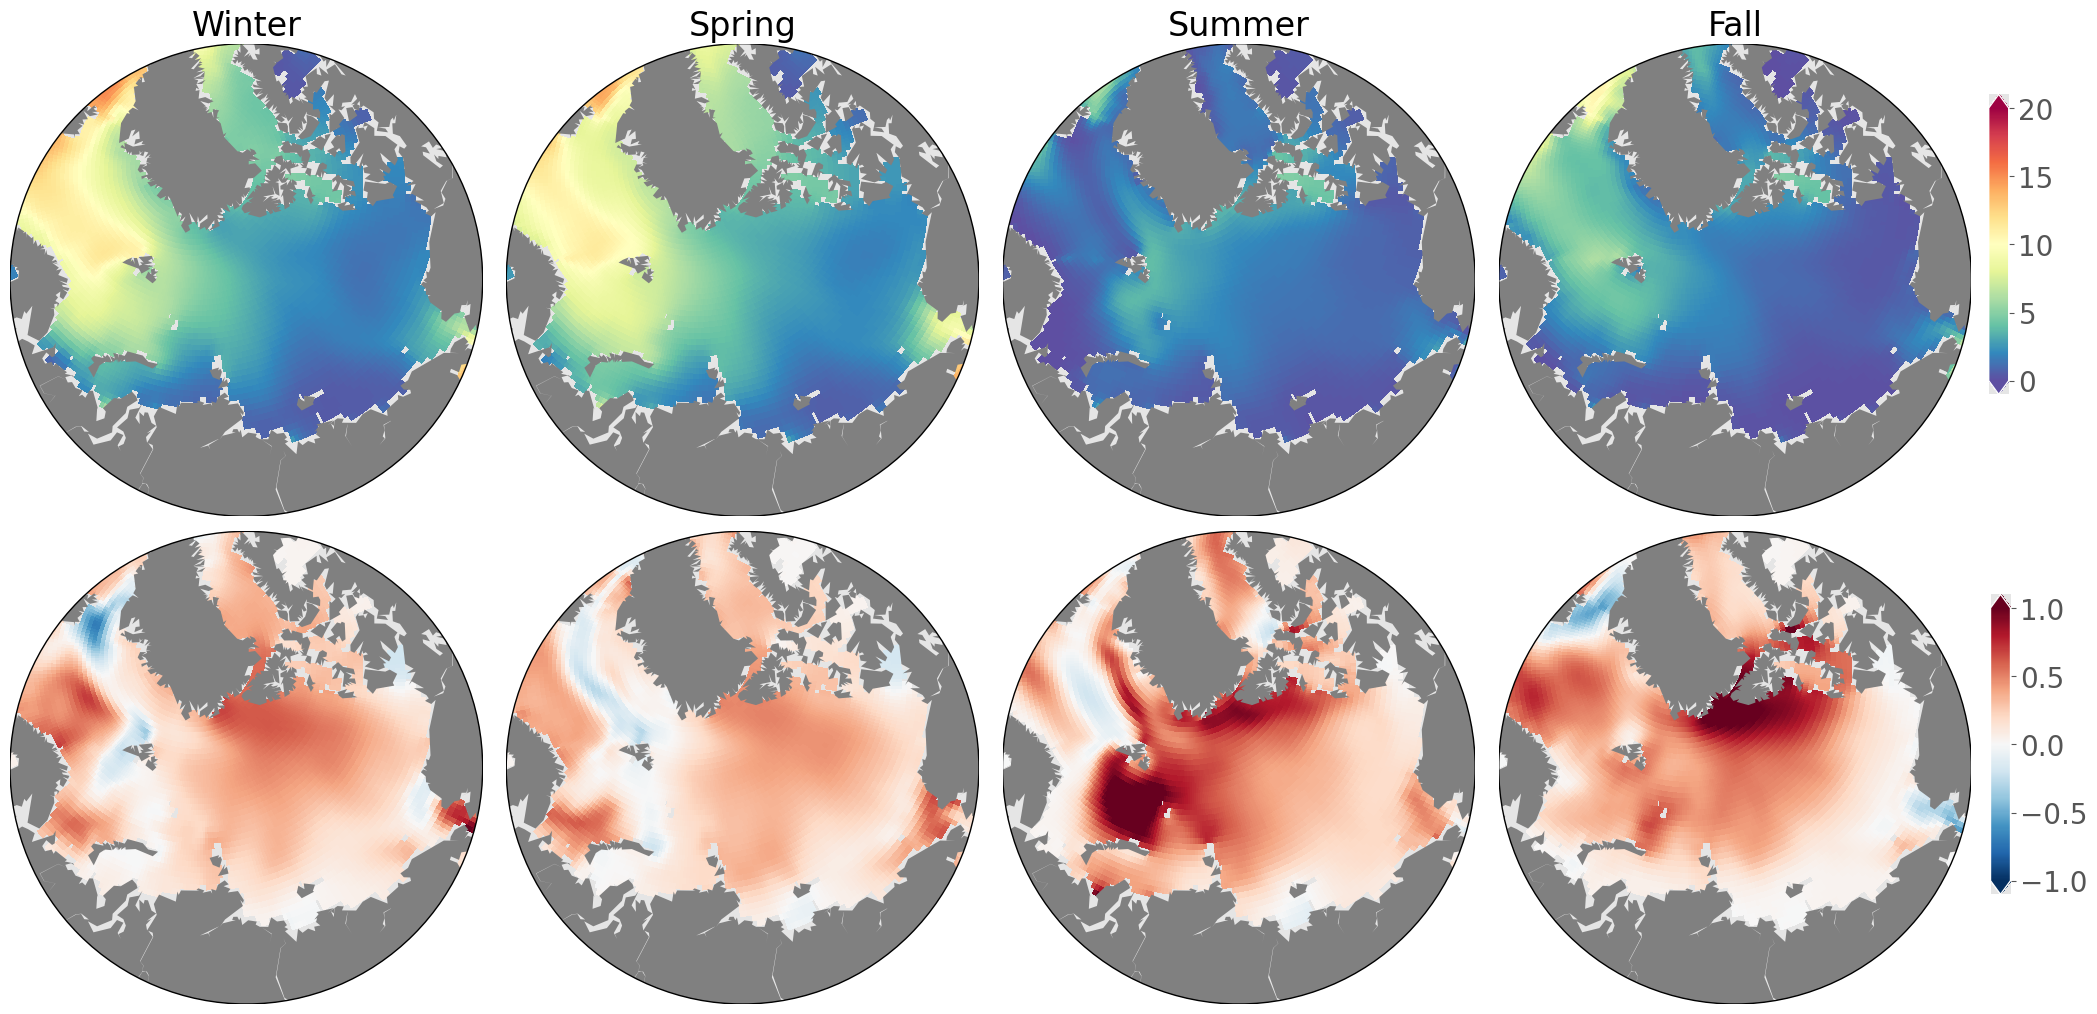

In [34]:
lev = np.arange(0, 1, 0.01)
norm = colors.TwoSlopeNorm(vmin=lev[0], vmax=lev[-1], vcenter=0.5)
fig = plt.figure(figsize=(20, 20))

# Winter 
ax = fig.add_subplot(4, 4, 1)
lon, lat, winter = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_winter_avg.NO3[:,0,:,:],axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, winter, cmap='Spectral_r', vmin = 0, vmax = 20);
ax.set_title('Winter', fontsize =24)

# Spring 
ax = fig.add_subplot(4, 4, 2)
#ax = axes_1[2]
lon, lat, spring = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_spring_avg.NO3[:,0,:,:], axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, spring, cmap='Spectral_r', vmin = 0, vmax = 20);
ax.set_title('Spring', fontsize =24)

# Summer 
ax = fig.add_subplot(4, 4, 3)
#ax = axes_1[3]
lon, lat, summer = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_summer_avg.NO3[:,0,:,:], axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, summer, cmap='Spectral_r', vmin = 0, vmax = 20);
ax.set_title('Summer', fontsize =24)

# Fall 
ax = fig.add_subplot(4, 4, 4)
#ax = axes_1[4]
lon, lat, fall = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_fall_avg.NO3[:,0,:,:], axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, fall, cmap='Spectral_r', vmin = 0, vmax = 20);
ax.set_title('Fall', fontsize =24)

cbar_ax = fig.add_axes([0.999, 0.8, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
cb.ax.tick_params(labelsize=20)

########## Differences!!! ############
vminn = -1
vmaxx = 1
##########################################



# Winter, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 5)
#ax = axes_2[0]
winter_temp_diff = ((np.nanmean(high_no3_years_winter, axis=(0,1))-np.nanmean(low_no3_years_winter, axis=(0,1))))
lon, lat, w_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, winter_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, w_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Spring, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 6)
#ax = axes_2[1]
spring_temp_diff = ((np.nanmean(high_no3_years_spring, axis=(0,1))-np.nanmean(low_no3_years_spring, axis=(0,1))))
lon, lat, sp_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, spring_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, sp_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Summer, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 7)
#ax = axes_2[2]
summer_temp_diff = ((np.nanmean(high_no3_years_summer, axis=(0,1))-np.nanmean(low_no3_years_summer, axis=(0,1))))
lon, lat, s_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, summer_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, s_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);


# Fall, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 8)
#ax = axes_2[3]
fall_temp_diff = ((np.nanmean(high_no3_years_fall, axis=(0,1))-np.nanmean(low_no3_years_fall, axis=(0,1))))
lon, lat, f_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, fall_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, f_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

cbar_ax = fig.add_axes([0.9999, 0.55, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
cb.ax.tick_params(labelsize=20)
plt.tight_layout()

## Ice Fraction

In [35]:
temp_inds = sorted(glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_ECOSYS_IFRAC*.nc', recursive=True))
ds_02= xr.open_mfdataset(temp_inds[1::],concat_dim='time', combine='nested') # Full 62 years of second cycle

In [36]:
ECOSYS_IFRAC_ds_inter = np.empty([62,12,180,360])
ECOSYS_IFRAC_ds_inter[:] = np.nan
x = np.array(range(0,744,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(62):
    ECOSYS_IFRAC_ds_inter[i,:,:,:] = ds_02.ECOSYS_IFRAC[x[i]:x[i]+12,:,:]

In [37]:
ice_arctic_01 = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:180,:], axis=(2,3))
ice_arctic_anom_01 = ice_arctic_01-np.nanmean(ice_arctic_01,axis=0)
err_ao_01 = np.nanstd(ice_arctic_anom_01,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
low_ice_years_arctic_01 = np.where(np.nanmean(ice_arctic_anom_01,axis=1) < -(err_ao_01/2))
high_ice_years_arctic_01 = np.where(np.nanmean(ice_arctic_anom_01,axis=1) > (err_ao_01/2))

low_ice_years_01 = np.nanmean(ECOSYS_IFRAC_ds_inter[low_ice_years_arctic_01,:,:,:],axis=(0,1,2))
high_ice_years_01 = np.nanmean(ECOSYS_IFRAC_ds_inter[high_ice_years_arctic_01,:,:,:],axis=(0,1,2)) 

In [38]:
inter['ECOSYS_IFRAC_ds_inter'] = xr.DataArray(ECOSYS_IFRAC_ds_inter, coords={'year':ds_fall_avg.year, 'time':ds.time, 'lat':ds.lat, 'lon':ds.lon},
                      dims=['year', 'time', 'lat', 'lon'])
ice_arctic_02 = esmlab.statistics.weighted_sum(inter.ECOSYS_IFRAC_ds_inter[:,:,149:180,:], weights=ds.TAREA[0,149:180,:], dim=['lat', 'lon'])
ice_arctic_anom_02 = ice_arctic_02-np.nanmean(ice_arctic_02,axis=0)
err_ao_02 = np.nanstd(ice_arctic_anom_02,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
low_ice_years_arctic_02 = np.where(np.nanmean(ice_arctic_anom_02,axis=1) < -(err_ao_02/2))
high_ice_years_arctic_02 = np.where(np.nanmean(ice_arctic_anom_02,axis=1) > (err_ao_02/2))

low_ice_years_02 = np.nanmean(ECOSYS_IFRAC_ds_inter[low_ice_years_arctic_02,:,:,:],axis=(0,1,2))
high_ice_years_02 = np.nanmean(ECOSYS_IFRAC_ds_inter[high_ice_years_arctic_02,:,:,:],axis=(0,1,2)) 

In [ ]:
fig = plt.figure(figsize=(20, 20))
lat = ds.lat

vari = 'ice'
units = ''
vmaxx=1
# Temperature 
ax = fig.add_subplot(3, 3, 2)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cold_01, lon = add_cyclic_point(low_no3_years_01, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,cold_01,cmap='Spectral_r',vmin=0,vmax=vmaxx)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title(f'Low {vari} years {units}', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 1)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
warm_01, lon = add_cyclic_point(high_no3_years_01, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,warm_01,cmap='Spectral_r',vmin=0,vmax=vmaxx)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title(f'High {vari} years {units}', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 3)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm_01-cold_01,cmap='RdBu_r', vmin = -0.5, vmax = 0.5)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title(f'Low - High {vari} years {units}', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 5)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cold_02, lon = add_cyclic_point(low_no3_years_02, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,cold_02,cmap='Spectral_r',vmin=0,vmax=vmaxx)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title(f'Low {vari} years, weighted {units}', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 4)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
warm_02, lon = add_cyclic_point(high_no3_years_02, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds_01.lat))
cf = m.pcolor(x,y,warm_02,cmap='Spectral_r',vmin=0,vmax=vmaxx)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title(f'High {vari} years, weighted {units}', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)


ax = fig.add_subplot(3, 3, 6)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm_02-cold_02,cmap='RdBu_r', vmin = -0.5, vmax = 0.5)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title(f'High-Low {vari} years weighted {units}', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 7)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,warm_01-warm_02,cmap='RdBu_r', vmin = -0.01, vmax = 0.01)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title(f'High-high {vari} years weighted {units}', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

ax = fig.add_subplot(3, 3, 8)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x,y,cold_01-cold_02,cmap='RdBu_r', vmin = -0.01, vmax = 0.01)
cb = plt.colorbar(cf, shrink=0.75, orientation='horizontal',extend = 'both')
cb.ax.set_title(f'Low-low {vari} years weighted {units}', fontsize = 22)
cb.ax.tick_params(labelsize=20)
ax.set_title('', fontsize =20)

plt.tight_layout()

In [40]:
case = 'g.e21.G1850ECOIAF.t62_g17.marbl0_33.GNG595'
path = f'/glade/campaign/cesm/development/bgcwg/projects/marbl-spectra/{case}/ocn/hist'

variables = [f'{var}' for var in ['ECOSYS_IFRAC']]
coords = {'x':'TLONG','y':'TLAT'}
keep_vars = variables + list(coords.values())+['dz','KMT','time']

In [41]:
%%time

ds_summer_avg = xr.Dataset()
ds_spring_avg = xr.Dataset()
ds_fall_avg = xr.Dataset()
ds_winter_avg =xr.Dataset()

for year in np.arange(63,125,1):
    yr4="0{:02d}".format(year).zfill(4)
    print(year)
    
    ds_summer = xr.Dataset()
    ds_spring = xr.Dataset()
    ds_winter = xr.Dataset()
    ds_fall = xr.Dataset()

    file = sorted(glob(f'{path}/{case}.pop.h.{yr4}-*.nc'))
    
    winter_indexes = [0,1,-1]
    winter_files = [file[ind] for ind in winter_indexes]
    dsv_winter=xr.open_mfdataset(winter_files, decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
        
    dsv_summer=xr.open_mfdataset(file[5:8], decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
    dsv_spring=xr.open_mfdataset(file[2:5], decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
    dsv_fall=xr.open_mfdataset(file[8:11], decode_times=True,drop_variables=["transport_components", "transport_regions"], 
                            parallel=True, compat="override", combine='nested', concat_dim="time",data_vars="minimal",coords='minimal' )
    
    for vv in variables: 
        ds_summer = xr.merge((ds_summer, dsv_summer[vv]))
        ds_spring = xr.merge((ds_spring, dsv_spring[vv]))
        ds_winter = xr.merge((ds_winter, dsv_winter[vv]))
        ds_fall = xr.merge((ds_fall, dsv_fall[vv]))
        

    ds_summer = ds_summer.drop([v for v in ds_summer.variables if v not in keep_vars]).squeeze()
    ds_summer = ds_summer.mean(dim='time')
    ds_summer_avg = xr.concat([ds_summer_avg, ds_summer],dim='year')
    
    ds_spring = ds_spring.drop([v for v in ds_spring.variables if v not in keep_vars]).squeeze()
    ds_spring = ds_spring.mean(dim='time')
    ds_spring_avg = xr.concat([ds_spring_avg, ds_spring],dim='year')
    
    ds_winter = ds_winter.drop([v for v in ds_winter.variables if v not in keep_vars]).squeeze()
    ds_winter = ds_winter.mean(dim='time')
    ds_winter_avg = xr.concat([ds_winter_avg, ds_winter],dim='year')
    
    ds_fall = ds_fall.drop([v for v in ds_fall.variables if v not in keep_vars]).squeeze()
    ds_fall = ds_fall.mean(dim='time')
    ds_fall_avg = xr.concat([ds_fall_avg, ds_fall],dim='year')

63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
CPU times: user 10min 21s, sys: 35 s, total: 10min 56s
Wall time: 11min 54s


In [42]:
ice_frac_summer = np.array(ds_summer_avg.ECOSYS_IFRAC)
ice_frac_winter = np.array(ds_winter_avg.ECOSYS_IFRAC)
ice_frac_fall = np.array(ds_fall_avg.ECOSYS_IFRAC)
ice_frac_spring = np.array(ds_spring_avg.ECOSYS_IFRAC)

In [43]:
## ice
low_ice_years_summer = ice_frac_summer[low_ice_years_arctic_02,:,:] # 1/2 standard deviation 
high_ice_years_summer = ice_frac_summer[high_ice_years_arctic_02,:,:] # 1/2 standard deviation 

low_ice_years_spring = ice_frac_spring[low_ice_years_arctic_02,:,:] # 1/2 standard deviation 
high_ice_years_spring= ice_frac_spring[high_ice_years_arctic_02,:,:] # 1/2 standard deviation 

low_ice_years_fall = ice_frac_fall[low_ice_years_arctic_02,:,:] # 1/2 standard deviation 
high_ice_years_fall = ice_frac_fall[high_ice_years_arctic_02,:,:] # 1/2 standard deviation 

low_ice_years_winter = ice_frac_winter[low_ice_years_arctic_02,:,:] # 1/2 standard deviation 
high_ice_years_winter = ice_frac_winter[high_ice_years_arctic_02,:,:] # 1/2 standard deviation 

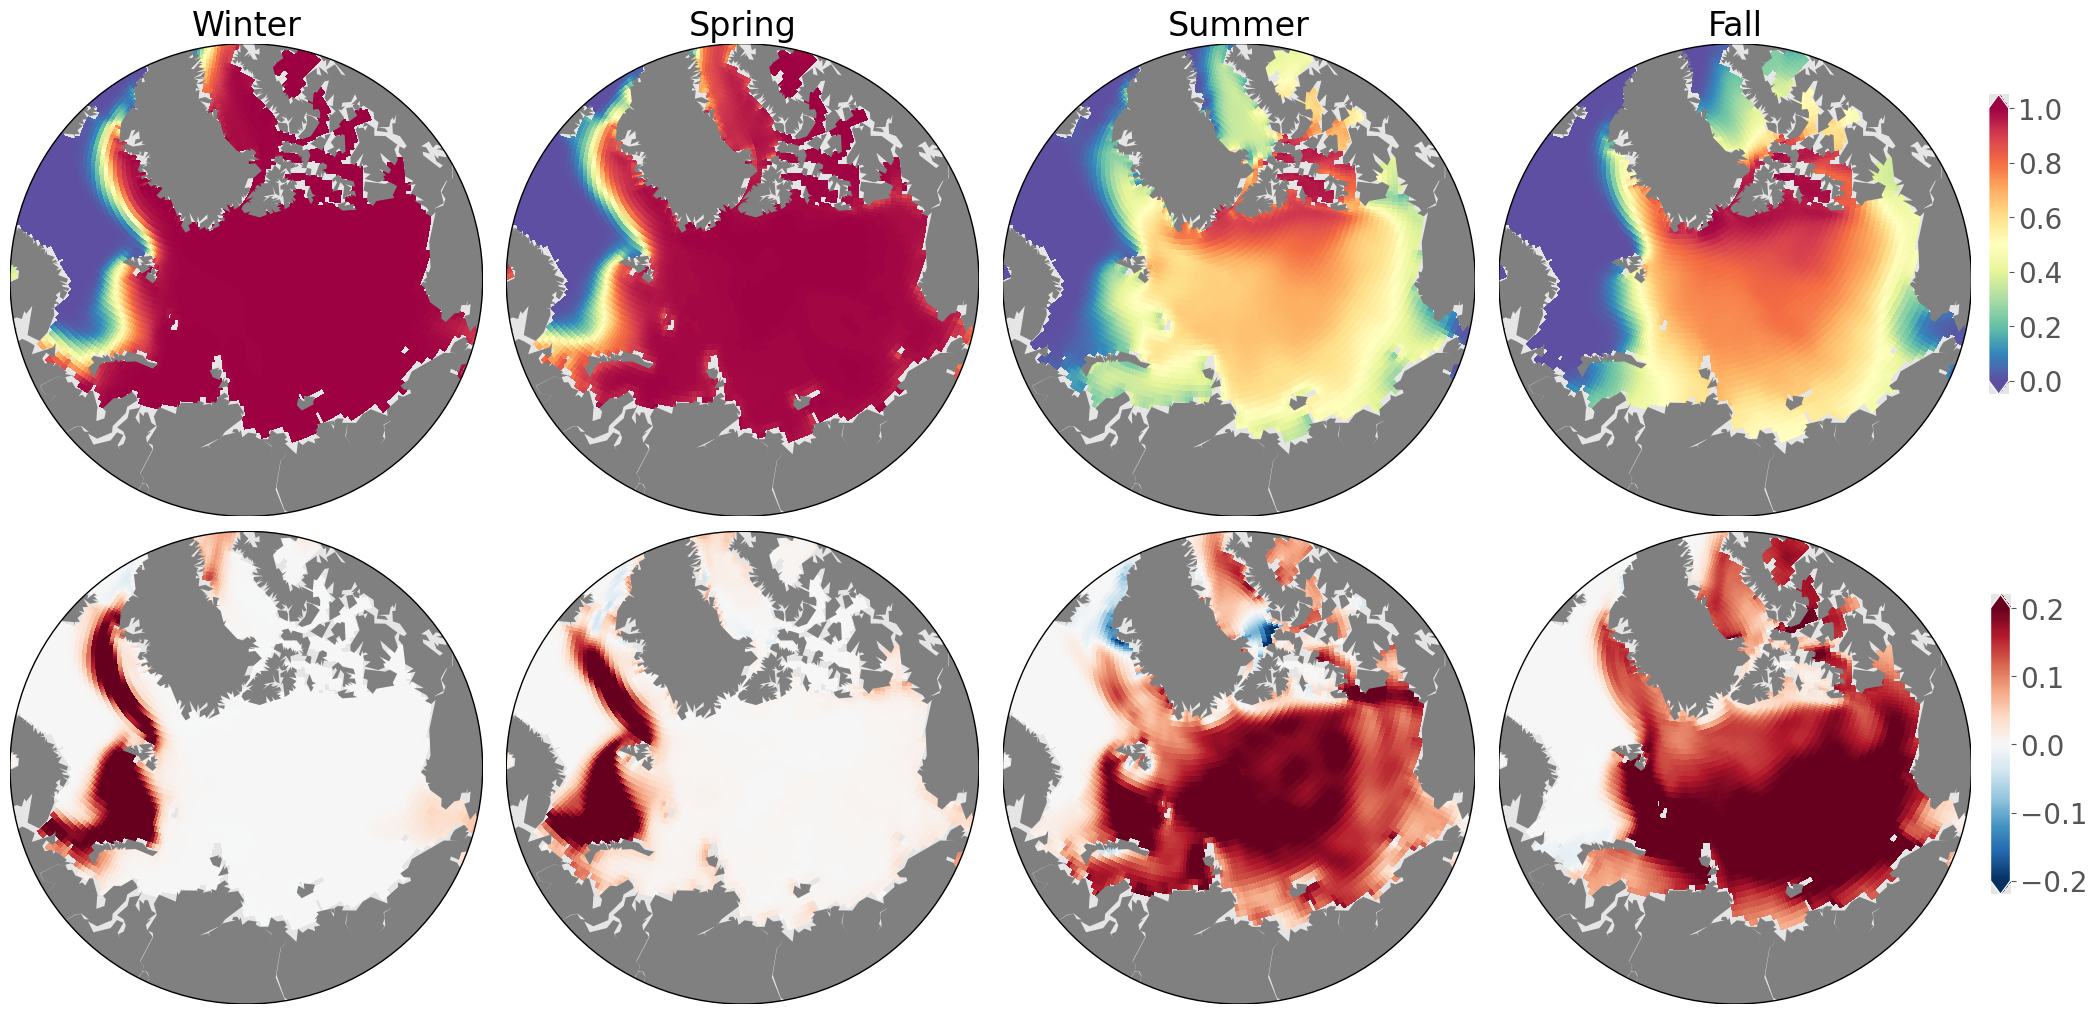

In [45]:
lev = np.arange(0, 1, 0.01)
norm = colors.TwoSlopeNorm(vmin=lev[0], vmax=lev[-1], vcenter=0.5)
fig = plt.figure(figsize=(20, 20))


# Varuabkes 
vmaxx=1


# Winter 
ax = fig.add_subplot(4, 4, 1)
lon, lat, winter = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_winter_avg.ECOSYS_IFRAC[:,:,:],axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, winter, cmap='Spectral_r', vmin = 0, vmax = vmaxx);
ax.set_title('Winter', fontsize =24)

# Spring 
ax = fig.add_subplot(4, 4, 2)
#ax = axes_1[2]
lon, lat, spring = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_spring_avg.ECOSYS_IFRAC[:,:,:], axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, spring, cmap='Spectral_r', vmin = 0, vmax = vmaxx);
ax.set_title('Spring', fontsize =24)

# Summer 
ax = fig.add_subplot(4, 4, 3)
#ax = axes_1[3]
lon, lat, summer = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_summer_avg.ECOSYS_IFRAC[:,:,:], axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, summer, cmap='Spectral_r', vmin = 0, vmax = vmaxx);
ax.set_title('Summer', fontsize =24)

# Fall 
ax = fig.add_subplot(4, 4, 4)
#ax = axes_1[4]
lon, lat, fall = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, np.nanmean(ds_fall_avg.ECOSYS_IFRAC[:,:,:], axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, fall, cmap='Spectral_r', vmin = 0, vmax = vmaxx);
ax.set_title('Fall', fontsize =24)

cbar_ax = fig.add_axes([0.999, 0.8, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
cb.ax.tick_params(labelsize=20)

########## Differences!!! ############
vminn = -0.2
vmaxx = 0.2
##########################################



# Winter, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 5)
#ax = axes_2[0]
winter_temp_diff = ((np.nanmean(high_ice_years_winter, axis=(0,1))-np.nanmean(low_ice_years_winter, axis=(0,1))))
lon, lat, w_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, winter_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, w_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Spring, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 6)
#ax = axes_2[1]
spring_temp_diff = ((np.nanmean(high_ice_years_spring, axis=(0,1))-np.nanmean(low_ice_years_spring, axis=(0,1))))
lon, lat, sp_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, spring_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, sp_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Summer, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 7)
#ax = axes_2[2]
summer_temp_diff = ((np.nanmean(high_ice_years_summer, axis=(0,1))-np.nanmean(low_ice_years_summer, axis=(0,1))))
lon, lat, s_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, summer_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, s_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);


# Fall, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 8)
#ax = axes_2[3]
fall_temp_diff = ((np.nanmean(high_ice_years_fall, axis=(0,1))-np.nanmean(low_ice_years_fall, axis=(0,1))))
lon, lat, f_diff = adjust_pop_grid(ds_winter_avg.TLONG, ds_winter_avg.TLAT, fall_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, f_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

cbar_ax = fig.add_axes([0.9999, 0.55, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
cb.ax.tick_params(labelsize=20)
plt.tight_layout()